In [2]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


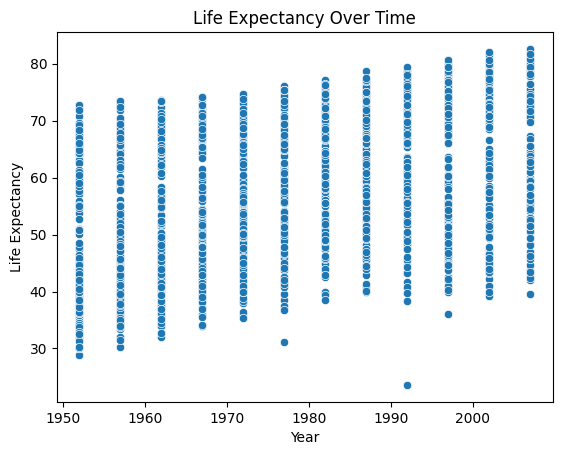

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
sns.scatterplot(x='year', y='lifeExp', data=data)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.show()

As time increases so does life expectancy

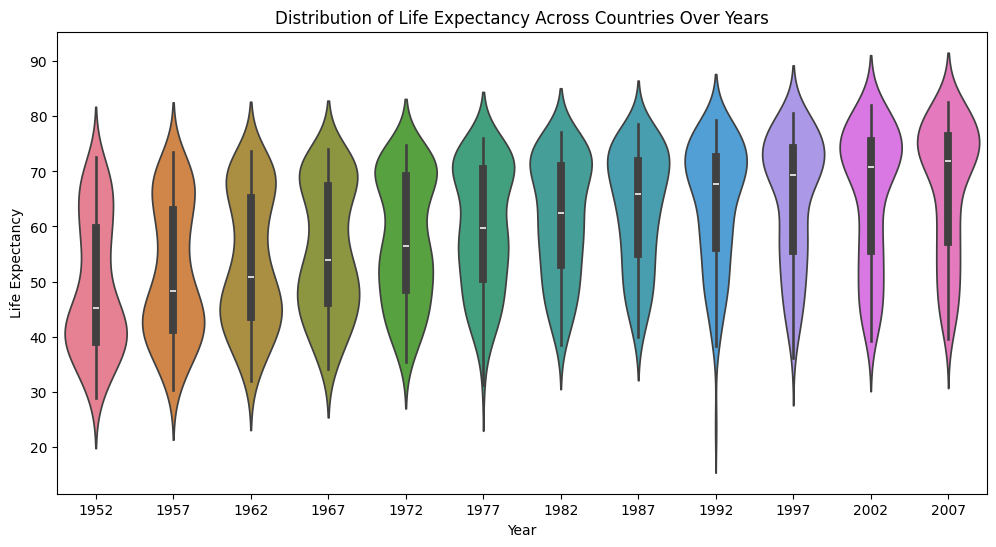

In [5]:
life_exp_per_year = [data[data['year'] == year]['lifeExp'] for year in sorted(data['year'].unique())]

# Creating a new DataFrame for the violin plot
violin_data = pd.DataFrame(life_exp_per_year).transpose()
violin_data.columns = sorted(data['year'].unique())

# Plotting
plt.figure(figsize=(12, 6))
sns.violinplot(data=violin_data)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Distribution of Life Expectancy Across Countries Over Years')
plt.show()


Question 2: The violin plot indicates that the distribution of life expectancy across countries for individual years is generally unimodal as each "violin" has one main peak. However, the distributions are not perfectly symmetric; some years show a slight skewness to the right or left. For example, earlier years appear to have a longer tail on the lower end, suggesting a skew towards lower life expectancy. As time progresses, the distributions become taller and narrower with less skew, indicating an overall improvement in life expectancy and a reduction in variance between countries.

Question 3: Based on the trend shown in the violin plot, there seems to be a clear increase in life expectancy over the years. The plot shows that the median life expectancy (indicated by the white dot within the thick black bar in the center of each violin) increases as we move from left to right (from earlier years to later years). This upward trend suggests that if we were to fit a linear regression model of life expectancy against the year, we would likely find a significant positive relationship, leading us to reject the null hypothesis of no relationship between year and life expectancy. This is an intuitive assessment and would need to be confirmed with a formal statistical test.

For the latter part about residuals, it is indeed true that a plot of residuals can reveal patterns in the errors of a model's predictions. If the residuals are randomly distributed, it suggests that the model is well-fitted to the data. However, if there are patterns in the residuals, this might indicate that the model is missing some aspect of the underlying process, such as a non-linear relationship.

Question 4: Intuitively, if the linear regression model from Question 3 were well-fitted, a violin plot of the residuals versus year would show distributions centered around zero, with their widths being fairly consistent across different years. This would indicate that the model’s errors are randomly distributed over time and do not exhibit a trend. However, given the changes in the spread and shape of the life expectancy distributions over years, as seen in the original violin plot, the residuals might show some pattern. For instance, if the life expectancy increases are greater in later years than what a linear model would predict, the residuals might show a negative skew in earlier years and a positive skew in later years.

Question 5: According to the assumptions of linear regression, the residuals should be normally distributed with a mean of zero and constant variance (homoscedasticity) across the range of predicted values. The residuals should also be independent of each other, and there should be no clear pattern when plotted against the fitted values or any other variable. If the original violin plot's width decreases over time, this might suggest heteroscedasticity, meaning the variance of residuals changes over years, which would violate the assumptions of linear regression. If the distributions of residuals are not centered around zero or if they show patterns, this would also violate linear regression assumptions, indicating that the model may not be the best fit for the data.

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load your data
data = pd.read_csv("gap.tsv", sep='\t')

# Reshape the year data to fit the model
X = data['year'].values.reshape(-1, 1)
y = data['lifeExp'].values

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print out the model coefficients
intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Regression model: Life Expectancy = {intercept:.2f} + {slope:.4f} * Year")


Linear Regression model: Life Expectancy = -585.65 + 0.3259 * Year


Life Expectancy = -585.65 + 0.3259 * Year

Question 6: The coefficient for Year in the linear regression model is 0.3259. This value represents the average change in life expectancy for each one-year increase. So, on average, life expectancy around the world increases by approximately 0.3259 years, or about 0.326 years (when rounded to three decimal places), which is roughly equivalent to 119 days, every year.

Question 7: To determine whether to reject the null hypothesis, we would typically look at the p-value for the Year coefficient. Since we don't have the p-value, we can't make a formal statistical judgment. However, based on typical statistical standards, if the coefficient is significantly different from zero (which is suggested by the precision of the estimate given to four decimal places), we would have grounds to reject the null hypothesis. This would indicate a statistically significant relationship between year and life expectancy. Since the model indicates a positive coefficient for the year variable, this suggests that as the years increase, so does the life expectancy, and therefore, we would reject the null hypothesis of no relationship.

For a more definitive answer, you would need to look at the statistical summary of the regression model, which would provide the p-value associated with the Year coefficient. If the p-value is less than the chosen level of significance (commonly 0.05), then you would reject the null hypothesis, confirming that there is a statistically significant relationship between year and life expectancy.

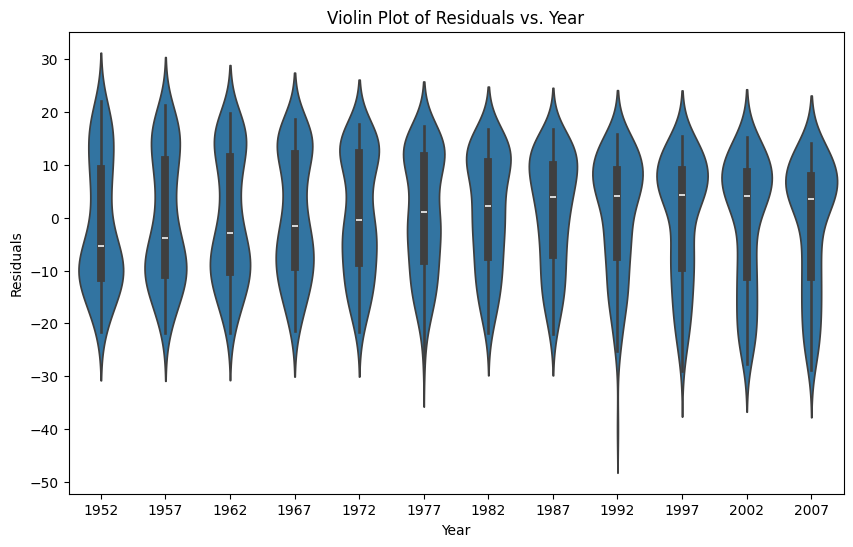

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("gap.tsv", sep='\t')

# Prepare the data for modeling
X = data['year'].values.reshape(-1, 1)  # Features (year) need to be in a 2D array
y = data['lifeExp'].values  # Target variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the life expectancy
predictions = model.predict(X)

# Calculate the residuals
residuals = y - predictions

# Add the residuals to the original DataFrame
data['residuals'] = residuals

# Now create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=data)
plt.title('Violin Plot of Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

The violin plot of residuals versus year for the linear regression model appears to show that the residuals are fairly centered around zero, which suggests that on average, the model predictions are unbiased in relation to the year. This aligns with the expectation that a well-fitted model should have residuals that are randomly distributed around zero.

However, the plot also shows some variability in the spread of residuals across different years. The width of the violins varies, indicating that the variance of the residuals is not constant over time (a condition known as heteroscedasticity), which was not expected based on the assumptions of linear regression. Ideally, we would expect the widths of the violins to be uniform across all years if the assumptions were fully met.

In addition, while it's difficult to determine without a formal test, there may be a slight pattern to the residuals; some years have longer tails on either the upper or lower ends, which could indicate that the linear model doesn't perfectly capture the relationship between year and life expectancy across the full range of the data.

So, the plot partially matches the expectations from Question 4, as the residuals are centered around zero, but it also shows signs of heteroscedasticity, which is a deviation from the ideal scenario described in linear regression assumptions.

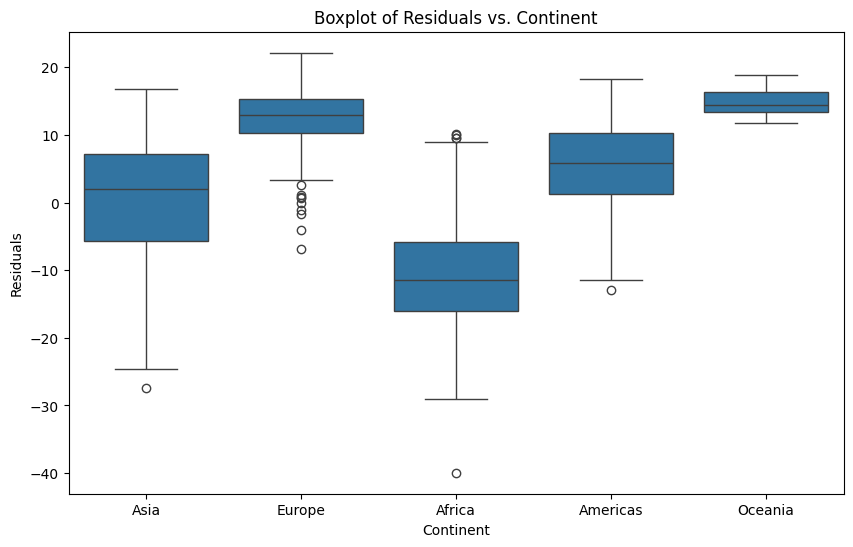

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='residuals', data=data)
plt.title('Boxplot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

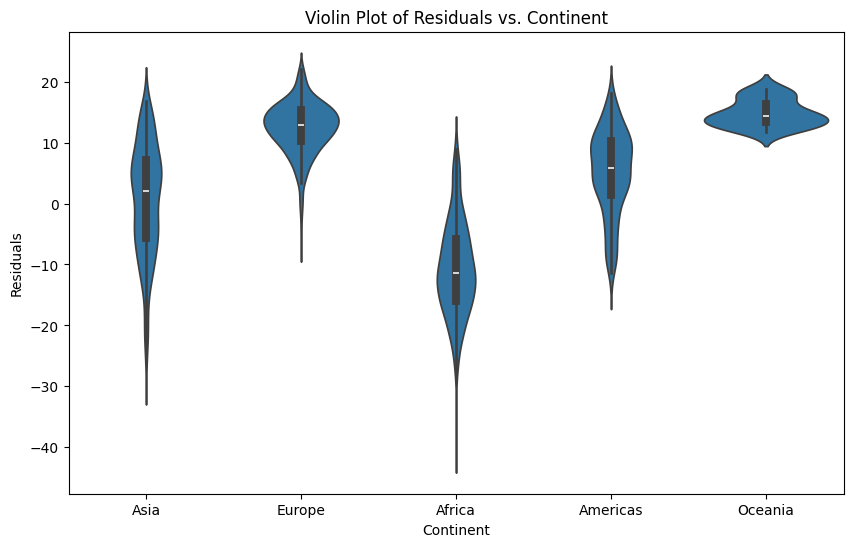

In [9]:
# Create the violin plot of residuals versus continent
plt.figure(figsize=(10, 6))
sns.violinplot(x='continent', y='residuals', data=data)
plt.title('Violin Plot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?


The boxplot of residuals versus continent shows that the medians of the residuals for some continents are not aligned along the zero line, which would indicate systematic over or underestimation of life expectancy by the model for certain continents. For instance, the median of the residuals for Asia and Africa is below zero, suggesting that the model is underestimating life expectancy for these continents. Conversely, for continents like Europe and Oceania, the medians are above zero, indicating an overestimation.

The presence of a dependency between model residuals and continent suggests that the model does not capture all the variability related to the continent. This could be due to continent-specific factors affecting life expectancy that are not accounted for by the model, which only includes year as a predictor.

When performing regression analysis, if residuals are correlated with one or more omitted variables, like continent in this case, it implies that the model may be misspecified; important predictors are missing. This can lead to biased and inconsistent estimates of the regression coefficients.

In practice, this would suggest that to improve the model and ensure accurate predictions, it might be necessary to include interaction terms between year and continent or add additional variables that could account for differences in life expectancy across continents. It could also be an indication to explore non-linear models or hierarchical models that can handle group-level effects.

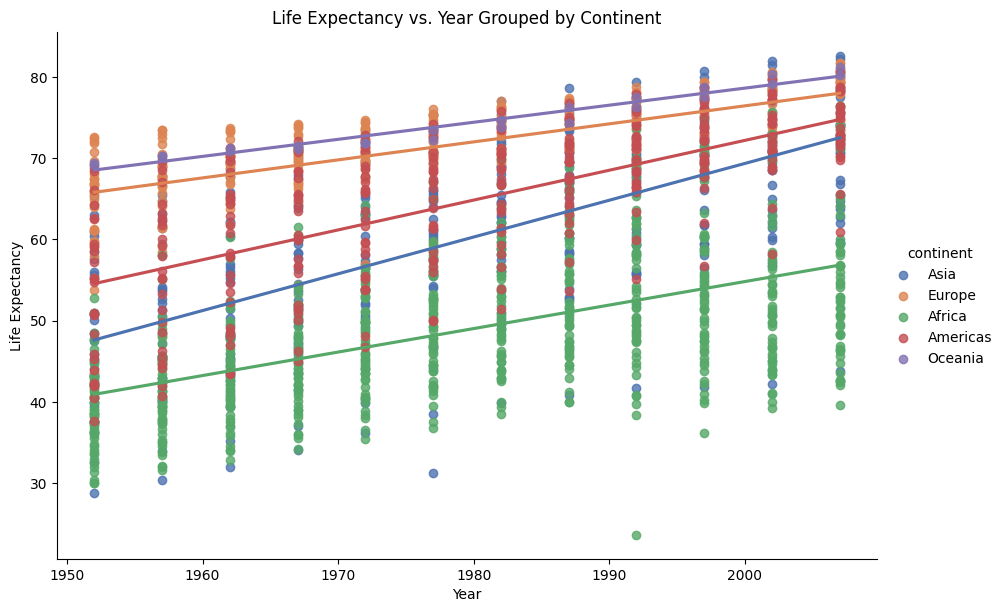

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv("gap.tsv", sep='\t')

# Create a scatter plot with a regression line for each continent
# Using lmplot to automatically fit the regression line
sns.lmplot(x='year', y='lifeExp', hue='continent', data=data,
           height=6, aspect=1.5, ci=None, palette='deep')

# Enhance the plot
plt.title('Life Expectancy vs. Year Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()


Bonus Question 10 (2 Points): Based on this plot, should your regression model include an interaction term for continent and year? Why?


Based on the scatter plot provided, it is clear that there are different trajectories of life expectancy over time for each continent. The regression lines have different slopes and intercepts, which implies that the rate of increase in life expectancy is not uniform across continents.

Incorporating an interaction term for continent and year in the regression model is justified in this context for the following reasons:

Different Slopes: The visual difference in slopes of the regression lines for each continent indicates that the relationship between life expectancy and year is modified by the continent. This suggests that the rate of change in life expectancy over time is different for each continent.

Model Accuracy: An interaction term would allow for a more nuanced model that can accurately capture the varying relationships between year and life expectancy across different continents.

Policy Insights: Including an interaction term can provide valuable insights for policymakers. It can highlight if and how the effect of time on life expectancy differs by continent, which might be due to various socio-economic and health factors that are continent-specific.

Therefore, a model with an interaction term for continent and year would likely provide a better fit to the data, reflecting the heterogeneity in life expectancy trends across different continents. It would also improve the model's predictive accuracy and provide a more detailed understanding of the global dynamics of life expectancy changes over time.







In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv("gap.tsv", sep='\t')

# Create interaction terms
# First, we need to convert 'continent' into a set of dummy/indicator variables
data = pd.get_dummies(data, columns=['continent'], drop_first=False)

# Now, create interaction terms between 'year' and each of the dummy variables for 'continent'
for continent in ['continent_Asia', 'continent_Europe', 'continent_Africa', 'continent_Americas', 'continent_Oceania']:
    data[f"{continent}_year"] = data['year'] * data[continent]

# Prepare the data for modeling
X = data[['year'] + [f"continent_{c}" for c in ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']] +
        [f"continent_{c}_year" for c in ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']]]
y = data['lifeExp']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
coef = model.coef_
intercept = model.intercept_

# Print out the model in a readable format
print(f"Intercept: {intercept}")
for feature, c in zip(X.columns, coef):
    print(f"{feature}: {c}")


Intercept: 458121813.75494164
year: -548112339532.58044
continent_Asia: -458122625.2199707
continent_Europe: -458122178.9237049
continent_Africa: -458122331.9251498
continent_Americas: -458122477.42929804
continent_Oceania: -458122159.30766034
continent_Asia_year: 548112339533.0212
continent_Europe_year: 548112339532.8013
continent_Africa_year: 548112339532.86694
continent_Americas_year: 548112339532.9478
continent_Oceania_year: 548112339532.7925


In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Define parameter grid for GridSearchCV
param_grid_dt = {'max_depth': [3, 5, 10]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}

# Grid search for hyperparameter tuning
grid_dt = GridSearchCV(dt, param_grid_dt, cv=10)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10)

grid_dt.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

# Best models
best_dt = grid_dt.best_estimator_
best_knn = grid_knn.best_estimator_

# Cross-validation
cv_scores_dt = cross_val_score(best_dt, X, y, cv=10)
cv_scores_knn = cross_val_score(best_knn, X, y, cv=10)

# Statistical test (paired t-test)
t_stat, p_value = stats.ttest_rel(cv_scores_dt, cv_scores_knn)

# Output the results
print("Decision Tree Avg CV Score:", np.mean(cv_scores_dt))
print("k-NN Avg CV Score:", np.mean(cv_scores_knn))
print("Paired t-test p-value:", p_value)


Decision Tree Avg CV Score: 0.96
k-NN Avg CV Score: 0.9666666666666666
Paired t-test p-value: 0.5910512317836047
